## INSTALL LIBRARY AND IMPORT BEFORE USING LIBRARY

In [30]:
!pip install cufflinks

In [31]:
!pip install plotly

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

# from sklearn import preprocessing
# # Supress unnecessary warnings so that presentation looks clean
# import warnings
# warnings.filterwarnings("ignore")

# # Print all rows and columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# DATA WRANGLING

## DATASET

In [33]:
!ls /datasets/homecreditdata

application_train.csv


In [34]:
!ls /datasets/homecredittest

application_test.csv


In [35]:
!ls /datasets/hcdata1
!ls /datasets/hcdata2
!ls /datasets/hcdata3
!ls /datasets/hcdata4
!ls /datasets/hcdata5
!ls /datasets/hcdata6

bureau.csv
bureau_balance.csv
credit_card_balance.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv


In [36]:
# Corrected code for reading CSV files
application_train = pd.read_csv('/datasets/homecreditdata/application_train.csv', delimiter=",")
application_test = pd.read_csv('/datasets/homecredittest/application_test.csv',delimiter=",")

#data Terkait untuk EDA dan hubungan antara feature di setiap data
POS_CASH_balance = pd.read_csv('/datasets/hcdata5/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('/datasets/hcdata2/bureau_balance.csv')
previous_application = pd.read_csv('/datasets/hcdata6/previous_application.csv')
installments_payments = pd.read_csv('/datasets/hcdata4/installments_payments.csv')
credit_card_balance = pd.read_csv('/datasets/hcdata3/credit_card_balance.csv')
bureau = pd.read_csv('/datasets/hcdata1/bureau.csv')

# Exploring of Data

In [37]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [38]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [39]:
application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [40]:
application_test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

In [41]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [42]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [43]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [44]:
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [45]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [46]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [47]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [48]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [49]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [50]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [51]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

## check missing data

In [52]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train.head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953
FLOORSMIN_AVG             208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_MEDI            208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MEDI             182590  59.376738
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738

In [53]:
# checking missing data
total = application_test.isnull().sum().sort_values(ascending = False)
percent = (application_test.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_test  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_test.head(20)

Total    Percent
COMMONAREA_AVG            33495.0  10.892293
COMMONAREA_MODE           33495.0  10.892293
COMMONAREA_MEDI           33495.0  10.892293
NONLIVINGAPARTMENTS_AVG   33347.0  10.844165
NONLIVINGAPARTMENTS_MODE  33347.0  10.844165
NONLIVINGAPARTMENTS_MEDI  33347.0  10.844165
FONDKAPREMONT_MODE        32797.0  10.665310
LIVINGAPARTMENTS_AVG      32780.0  10.659781
LIVINGAPARTMENTS_MODE     32780.0  10.659781
LIVINGAPARTMENTS_MEDI     32780.0  10.659781
FLOORSMIN_MEDI            32466.0  10.557671
FLOORSMIN_AVG             32466.0  10.557671
FLOORSMIN_MODE            32466.0  10.557671
OWN_CAR_AGE               32312.0  10.507592
YEARS_BUILD_AVG           31818.0  10.346947
YEARS_BUILD_MEDI          31818.0  10.346947
YEARS_BUILD_MODE          31818.0  10.346947
LANDAREA_MEDI             28254.0   9.187964
LANDAREA_AVG              28254.0   9.187964
LANDAREA_MODE             28254.0   9.187964

In [54]:
# checking missing data
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_bureau_balance  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_bureau_balance.head(20)

Total  Percent
SK_ID_BUREAU                  0.0      NaN
MONTHS_BALANCE                0.0      NaN
STATUS                        0.0      NaN
AMT_ANNUITY                   NaN      NaN
AMT_CREDIT                    NaN      NaN
AMT_GOODS_PRICE               NaN      NaN
AMT_INCOME_TOTAL              NaN      NaN
AMT_REQ_CREDIT_BUREAU_DAY     NaN      NaN
AMT_REQ_CREDIT_BUREAU_HOUR    NaN      NaN
AMT_REQ_CREDIT_BUREAU_MON     NaN      NaN
AMT_REQ_CREDIT_BUREAU_QRT     NaN      NaN
AMT_REQ_CREDIT_BUREAU_WEEK    NaN      NaN
AMT_REQ_CREDIT_BUREAU_YEAR    NaN      NaN
APARTMENTS_AVG                NaN      NaN
APARTMENTS_MEDI               NaN      NaN
APARTMENTS_MODE               NaN      NaN
BASEMENTAREA_AVG              NaN      NaN
BASEMENTAREA_MEDI             NaN      NaN
BASEMENTAREA_MODE             NaN      NaN
CNT_CHILDREN                  NaN      NaN

In [55]:
# checking missing data
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_ID_PREV                 0  0.000000

In [56]:
# checking missing data
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_TERMINATION            673065  40.298129
DAYS_LAST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716

In [57]:
# checking missing data
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

Total   Percent
DAYS_ENTRY_PAYMENT   2905  0.021352
AMT_PAYMENT          2905  0.021352
SK_ID_PREV              0  0.000000

In [58]:
# checking missing data
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_ID_PREV                       0   0.000000

In [59]:
# checking missing data
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_ACTIVE                 0   0.000000

## checking duplicated data

In [60]:
# Checking for duplicated rows in each dataset
duplicates_application_train = application_train.duplicated().sum()
duplicates_application_test = application_test.duplicated().sum()
duplicates_POS_CASH_balance = POS_CASH_balance.duplicated().sum()
duplicates_bureau_balance = bureau_balance.duplicated().sum()
duplicates_previous_application = previous_application.duplicated().sum()
duplicates_installments_payments = installments_payments.duplicated().sum()
duplicates_credit_card_balance = credit_card_balance.duplicated().sum()
duplicates_bureau = bureau.duplicated().sum()

# You can print these values to see the count of duplicates in each dataset
print("Duplicate rows in application_train:", duplicates_application_train)
print("Duplicate rows in application_test:", duplicates_application_test)
print("Duplicate rows in POS_CASH_balance:", duplicates_POS_CASH_balance)
print("Duplicate rows in bureau_balance:", duplicates_bureau_balance)
print("Duplicate rows in previous_application:", duplicates_previous_application)
print("Duplicate rows in installments_payments:", duplicates_installments_payments)
print("Duplicate rows in credit_card_balance:", duplicates_credit_card_balance)
print("Duplicate rows in bureau:", duplicates_bureau)

Duplicate rows in application_train: 0
Duplicate rows in application_test: 0
Duplicate rows in POS_CASH_balance: 0
Duplicate rows in bureau_balance: 0
Duplicate rows in previous_application: 0
Duplicate rows in installments_payments: 0
Duplicate rows in credit_card_balance: 0
Duplicate rows in bureau: 0


(<Figure size 640x480 with 1 Axes>, <Figure size 1000x1500 with 4 Axes>)

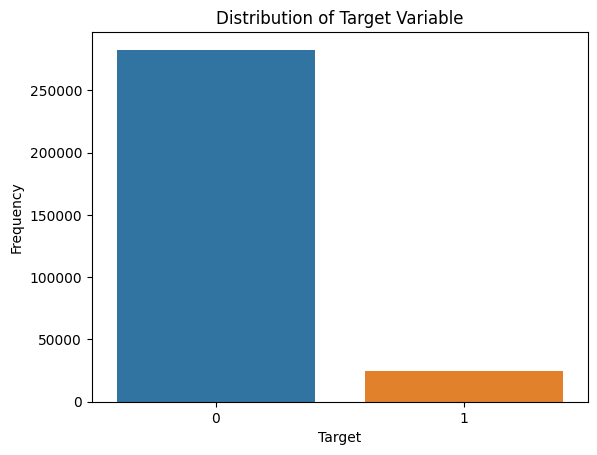

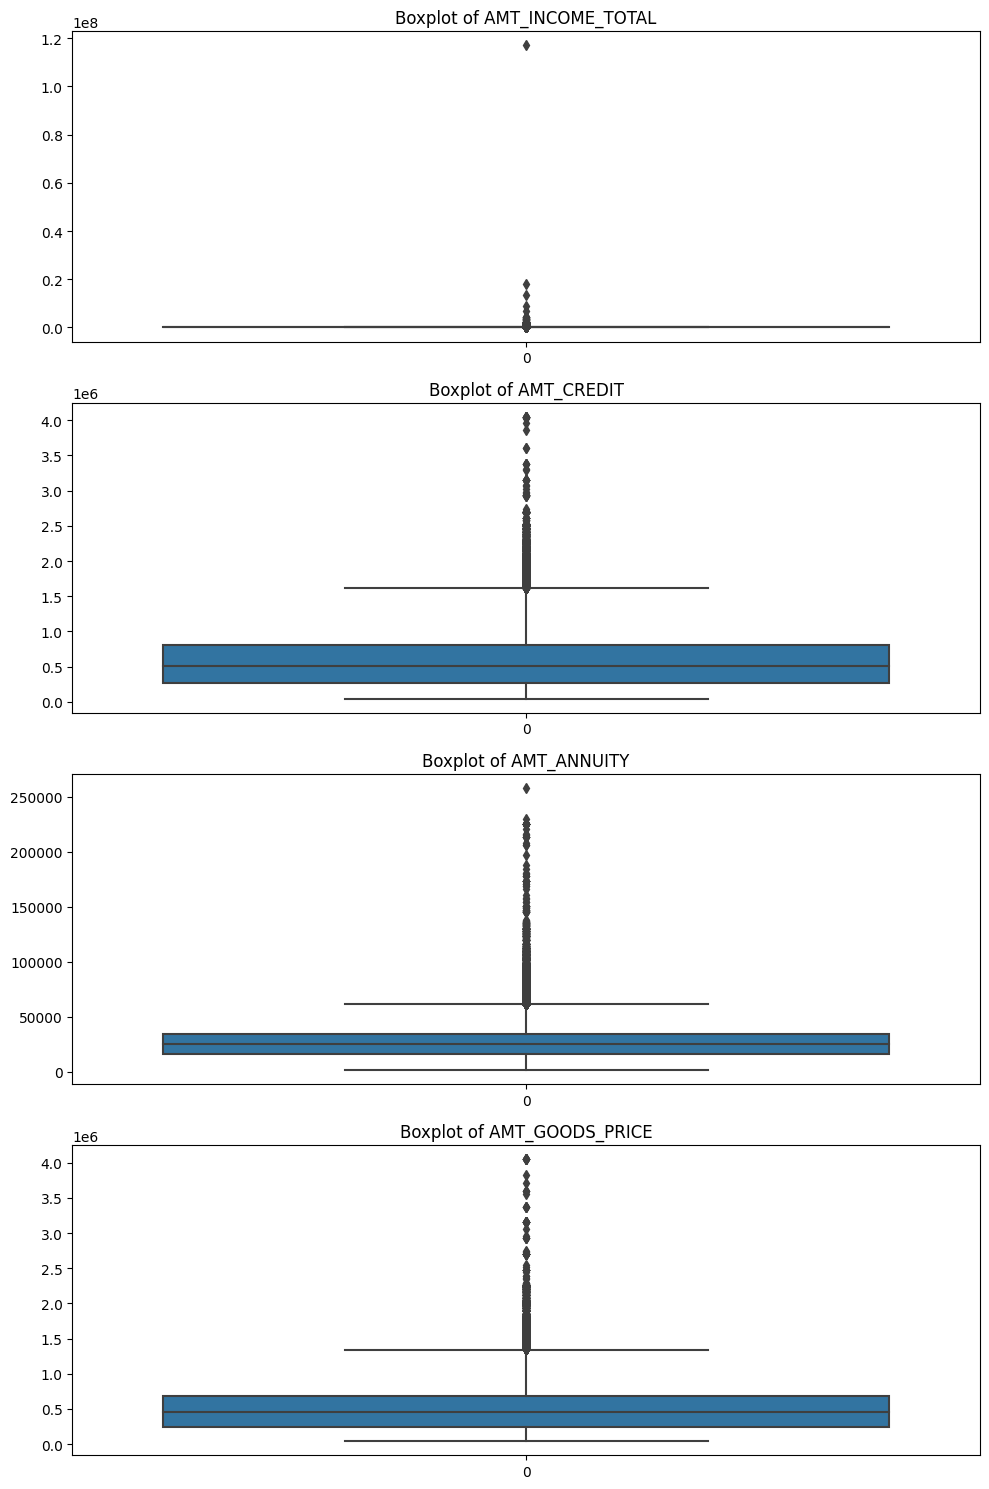

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the data due to execution state reset
data = application_train

# Checking for imbalance in the target variable
target_counts = data['TARGET'].value_counts()

# Correcting the barplot call
corrected_target_balance_fig, ax = plt.subplots()
sns.barplot(x=target_counts.index, y=target_counts.values, ax=ax)
ax.set_title('Distribution of Target Variable')
ax.set_xlabel('Target')
ax.set_ylabel('Frequency')

# Detecting outliers in a few numerical columns again
selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
outliers_fig, axs = plt.subplots(len(selected_columns), figsize=(10, 15))

for i, col in enumerate(selected_columns):
    sns.boxplot(data[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()

# Displaying the corrected figures
corrected_target_balance_fig, outliers_fig

# Exploratory Data Analysis

## Data Application_Train

### Distribution of AMT_CREDIT

/tmp/ipykernel_1728/2711807729.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




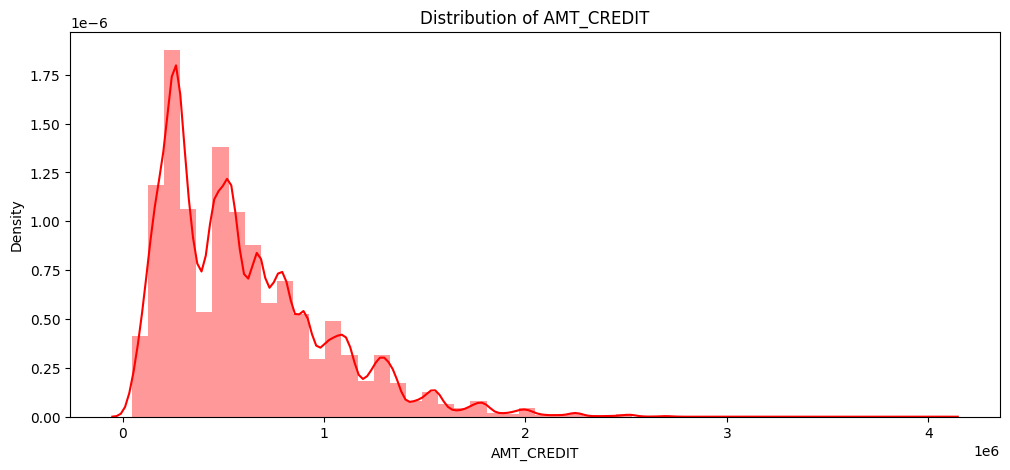

In [62]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"], kde=True, color="red")

### Distribution of AMT_INCOME_TOTAL

/tmp/ipykernel_1728/1186307201.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




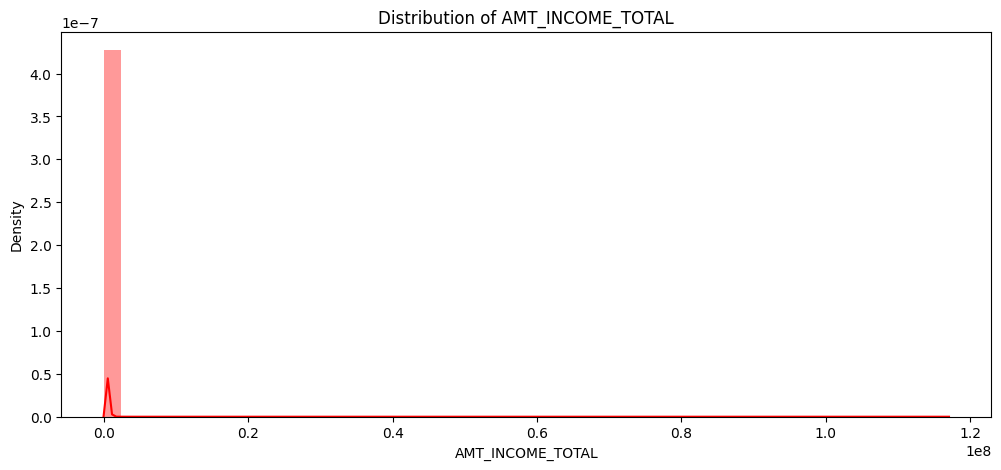

In [63]:
plt.figure(figsize=(12, 5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna(), kde=True, color="red")

### Distribution of AMT_GOODS_PRICE

/tmp/ipykernel_1728/958048640.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




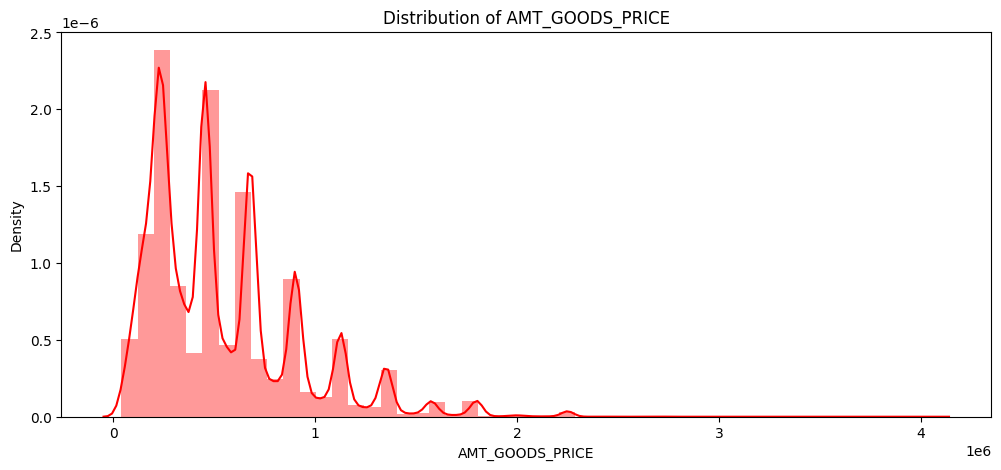

In [64]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna(),kde=True, color="red")

### Distribution of AMT_ANNUITY

/tmp/ipykernel_1728/594417173.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




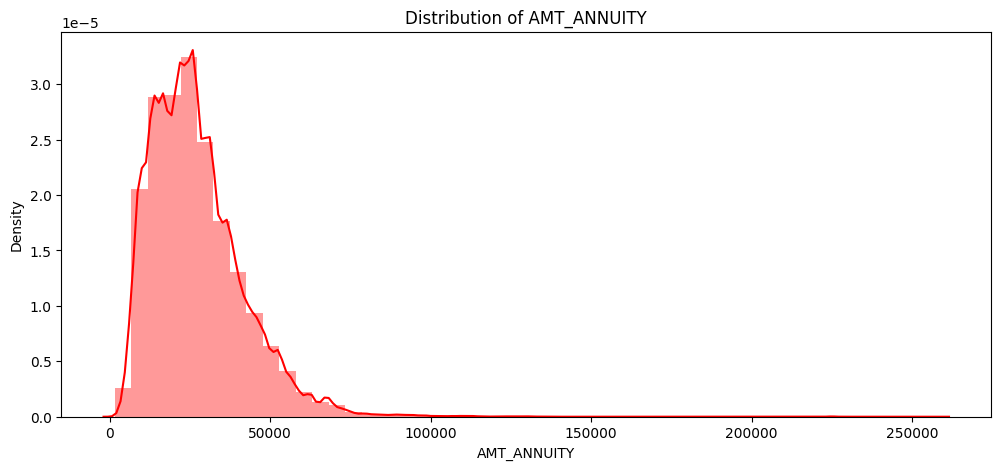

In [65]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(application_train["AMT_ANNUITY"].dropna(),kde=True, color="red")

### Identification of Companions During Client's Application Process

In [66]:
import plotly.graph_objs as go
import plotly.offline as py

# Calculating the percentage values
name_type_suite_counts = application_train["NAME_TYPE_SUITE"].value_counts()
percentage = (name_type_suite_counts / name_type_suite_counts.sum()) * 100

# Creating the bar chart
bar_chart = go.Bar(
    x = name_type_suite_counts.index,
    y = percentage
)

# Defining the layout
chart_layout = go.Layout(
    title = "Percentage of Companions Accompanying Clients in Applications",
    xaxis = dict(
        title = 'Companion Type',
        tickfont = dict(size = 14, color = 'rgb(120, 120, 120)')
    ),
    yaxis = dict(
        title = 'Percentage (%)',
        titlefont = dict(size = 16, color = 'rgb(120, 120, 120)'),
        tickfont = dict(size = 14, color = 'rgb(120, 120, 120)')
    )
)

# Creating the figure and plotting it
fig = go.Figure(data=[bar_chart], layout=chart_layout)
py.iplot(fig, filename='Companions_in_Application_Process')

## check outlier

### Data is balanced or imbalanced

In [67]:
### Data is balanced or imbalanced

import plotly.express as px

temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

fig = px.pie(df, names='labels', values='values', title='Loan Repayed or not')
fig.show()

Dapat dilihat bawah data sangat tidak balance 

### Types of loan


Rovolving loans: Pengaturan yang memungkinkan jumlah pinjaman dapat ditarik, dibayar kembali, dan ditarik kembali lagi dengan cara apa pun dan sebanyak mungkin, hingga pengaturan tersebut berakhir. Pinjaman kartu kredit dan kredit overdraft adalah jenis pinjaman roving. Juga disebut pinjaman evergreen.

In [68]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Import library untuk palet warna "viridis"
import plotly.express as px

temp = application_train["NAME_CONTRACT_TYPE"].value_counts()

# Menggunakan palet warna "viridis" dari plotly.express
colors = px.colors.sequential.Viridis

fig = go.Figure(data=[
    go.Pie(
        labels=temp.index,
        values=temp.values,
        hole=0.7,
        marker=dict(colors=colors)
    )
])

fig.update_layout(
    title="Types of loan",
    annotations=[
        {
            "font": {"size": 20},
            "showarrow": False,
            "text": "Loan Types",
            "x": 0.5,
            "y": 0.5
        }
    ]
)

iplot(fig, filename='donut')

### Sumber pendapatan dari calon peminjam

In [69]:
import plotly.express as px

# Palet warna "viridis" yang sudah dipilih secara manual
custom_color_palette = ['#440154', '#443982', '#31688e', '#21918c', '#35b779', '#6dcf70', '#b6de2b', '#fde725']

temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

fig = px.pie(df, names='labels', values='values', title='Income sources of Applicants', hole=0.5,
             color_discrete_sequence=custom_color_palette)
fig.show()

### Status Keluarga Pemohon yang mengajukan pinjaman
pada pengkategorian status perkawinan dan situasi keluarga dari individu yang mengajukan pinjaman. Ini melibatkan penentuan apakah pelamar adalah lajang, menikah, bercerai, atau telah kehilangan pasangan, dan juga mungkin termasuk informasi tentang tanggungan mereka, seperti anak-anak atau anggota keluarga lainnya. Data ini biasanya dikumpulkan selama proses pengajuan pinjaman untuk mengevaluasi tingkat tanggung jawab pribadi dan stabilitas keseluruhan pelamar, yang merupakan faktor yang dapat mempengaruhi kemampuan mereka dalam melunasi pinjaman.

In [70]:
import plotly.express as px

temp = application_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

# Menggunakan palet warna "viridis" dari Plotly Express
colors = px.colors.sequential.Viridis

fig = px.pie(df, names='labels', values='values', title="Family Status of Applicant's", hole=0.5,
             color_discrete_sequence=colors)
fig.show()

* 63,9% peminjam dana sudah menikah. 14,8% masih lajang, dll.

### Pekerjaan Pemohon yang mengajukan pinjaman

In [71]:
import plotly.express as px

temp = application_train["OCCUPATION_TYPE"].value_counts()

fig = px.bar(temp, x=temp.index, y=temp.values, 
             title="Occupation of Applicant's who applied for loan",
             labels={'x': 'Occupation', 'y': 'Count'},
             color_discrete_sequence=px.colors.sequential.Viridis_r)  # Menggunakan palet warna "Viridis_r"

fig.show()

Pemohon Teratas yang Mengajukan Pinjaman:
Pekerja Kasar - Sekitar 55 ribu orang
Staf Penjualan - Sekitar 32 ribu orang
Staf Inti - Sekitar 28 ribu orang
Manajer - Sekitar 21 ribu orang
Pengemudi - Sekitar 19 ribu orang

Ini adalah daftar lima pekerjaan teratas dari pemohon pinjaman yang paling banyak mengajukan pinjaman. Jumlah pemohon untuk setiap pekerjaan tersebut juga disertakan untuk memberikan gambaran tentang seberapa banyak orang yang mengajukan pinjaman dalam kategori pekerjaan tertentu.

### Tingkat Pendidikan Pemohon yang mengajukan pinjaman

In [72]:
import plotly.express as px

temp_education = application_train["NAME_EDUCATION_TYPE"].value_counts()

fig_education = px.pie(
    temp_education,
    names=temp_education.index,
    values=temp_education.values,
    title="Education of Applicants",
    hole=0.5,
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig_education.show()

* 71% peminjam memiliki pendidikan menengah dan 24,3% memiliki pendidikan tinggi.

### Untuk jenis rumah manakah pemohon yang lebih tinggi mengajukan pinjaman?

In [73]:
import plotly.express as px
import pandas as pd

# Counting the values for housing type
temp = application_train["NAME_HOUSING_TYPE"].value_counts()

# Creating a DataFrame for plotting
df = pd.DataFrame({'Housing Type': temp.index, 'Count': temp.values})

# Creating a pie chart with the 'Viridis' color scale
fig = px.pie(df, names='Housing Type', values='Count', title='Type of House', 
             color_discrete_sequence=px.colors.sequential.Viridis, hole=0.5)

# Display the pie chart
fig.show()

* Kira-kira. 89 % masyarakat mengajukan pinjaman, mereka menyebutkan tipe rumah adalah **Rumah / Apartemen**.

### Jenis Organisasi yang mengajukan pinjaman

In [74]:
import plotly.express as px

temp_organization = application_train["ORGANIZATION_TYPE"].value_counts()

fig_organization = px.bar(
    temp_organization,
    x=temp_organization.index,
    y=temp_organization.values,
    title="Types of Organizations who applied for loan",
    labels={'x': 'Organization Name', 'y': 'Count'},
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig_organization.show()

* **Jenis Organisasi yang Mengajukan Pinjaman:**
  * Business Entity Type 3 - Sekitar 68 ribu pengajuan
  * XNA - Sekitar 55 ribu pengajuan
  * Wiraswasta - Sekitar 38 ribu pengajuan
  * Lainnya - Sekitar 17 ribu pengajuan
  * Kesehatan - Sekitar 11 ribu pengajuan

Ini adalah daftar lima jenis organisasi yang paling banyak mengajukan pinjaman. Jumlah pengajuan pinjaman untuk setiap jenis organisasi tersebut juga disertakan untuk memberikan gambaran tentang seberapa banyak pengajuan pinjaman yang berasal dari jenis organisasi tertentu. "XNA" adalah singkatan yang mungkin mengindikasikan informasi yang hilang atau tidak diketahui.

### EDA untuk segi pinjaman dilunasi atau tidak

### Sumber pendapatan Pemohon dalam hal pinjaman dilunasi atau tidak dalam %

In [75]:
import plotly.express as px

temp = application_train.groupby(["NAME_INCOME_TYPE", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="Income sources of Applicant's in terms of loan repayment in %",
             labels={'x': 'Income source', 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()

### Status Keluarga Pemohon dalam hal pinjaman dilunasi atau tidak dalam %

In [76]:
import plotly.express as px

temp = application_train.groupby(["NAME_FAMILY_STATUS", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="Family Status of Applicant's in terms of loan repayment in %",
             labels={'x': 'Family Status', 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()

### Pekerjaan Pemohon dalam hal pinjaman dilunasi atau tidak dalam %

In [77]:
import plotly.express as px

temp = application_train.groupby(["OCCUPATION_TYPE", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="Occupation of Applicant's in terms of loan repayment in %",
             labels={'x': 'Occupation of Applicant\'s', 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()


### Pendidikan Pemohon dalam hal pinjaman dilunasi atau tidak dalam %

In [78]:
import plotly.express as px

temp = application_train.groupby(["NAME_EDUCATION_TYPE", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="Education of Applicant's in terms of loan repayment in %",
             labels={'x': "Education of Applicant's", 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()

### Untuk jenis rumah manakah pemohon yang lebih tinggi mengajukan pinjaman dalam hal pinjaman dilunasi atau tidak dalam %

In [79]:
import plotly.express as px

temp = application_train.groupby(["NAME_HOUSING_TYPE", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="For which types of house higher applicants applied for loan in terms of loan repayment in %",
             labels={'x': 'Types of house', 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()


### Jenis Organisasi dalam hal pinjaman dilunasi atau tidak dalam %

In [80]:
import plotly.express as px

temp = application_train.groupby(["ORGANIZATION_TYPE", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="Types of Organizations in terms of loan repayment in %",
             labels={'x': 'Types of Organizations', 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()

### Pembagian Nama Jenis Suite dalam hal pinjaman dilunasi atau tidak dalam %

In [81]:
import plotly.express as px

temp = application_train.groupby(["NAME_TYPE_SUITE", "TARGET"]).size().unstack().fillna(0)
temp["Total"] = temp.sum(axis=1)
temp["Percentage of NO"] = (temp[0] / temp["Total"]) * 100
temp["Percentage of YES"] = (temp[1] / temp["Total"]) * 100

fig = px.bar(temp, x=temp.index, y=["Percentage of NO", "Percentage of YES"],
             title="Distribution of Name of type of the Suite in terms of loan repayment in %",
             labels={'x': 'Name of type of the Suite', 'y': 'Percentage'},
             color_discrete_sequence=["green", "red"])
fig.show()

## EDA of previous application data

### Jenis produk kontrak dari aplikasi sebelumnya

In [82]:
import plotly.express as px

temp = previous_application["NAME_CONTRACT_TYPE"].value_counts()
fig = px.pie(temp, values=temp.values, names=temp.index, hole=0.7, title="Contract product type of previous application")
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1])
fig.show()

* **Jenis Produk Kontrak dari Aplikasi Sebelumnya :**
  * Pinjaman Tunai (Cash Loans) - 44,8 %
  * Pinjaman Konsumen (Consumer Loans) - 43,7 %
  * Pinjaman Revolving (Revolving Loan) - 11,6 %
  * XNA - 0,0207 %

Dalam bahasa Indonesia, ini menggambarkan jenis produk kontrak yang paling umum dari aplikasi sebelumnya. Jadi, sekitar 44,8% aplikasi sebelumnya adalah pinjaman tunai, 43,7% adalah pinjaman konsumen, 11,6% adalah pinjaman revolving, dan XNA (tidak diketahui) hanya sekitar 0,0207%. Data ini memberikan gambaran tentang jenis-jenis kontrak yang sering diajukan oleh pelamar sebelumnya.

### Pada hari mana jumlah klien terbanyak yang meminjam dalam aplikasi sebelumnya

In [83]:
import plotly.express as px

temp = previous_application["WEEKDAY_APPR_PROCESS_START"].value_counts()
temp_percentage = (temp / temp.sum()) * 100

fig = px.bar(temp_percentage, x=temp_percentage.index, y=temp_percentage.values,
             title="Hari mana dengan jumlah pelanggan tertinggi mengajukan aplikasi dalam aplikasi sebelumnya",
             labels={'x': 'Hari dalam Seminggu', 'y': 'Jumlah dalam %'},
             color=temp_percentage.index)
fig.show()

sekitar 15% pelanggan mengajukan aplikasi pada setiap hari kerja dalam seminggu, yaitu Selasa, Rabu, Senin, Jumat, dan Kamis.
Ini berarti bahwa sekitar 15% dari total pelanggan mengajukan aplikasi pada hari-hari tersebut dengan proporsi yang hampir sama untuk setiap hari dalam seminggu.

### Tujuan pinjaman tunai di aplikasi sebelumnya

In [84]:
import plotly.express as px

temp = previous_application["NAME_CASH_LOAN_PURPOSE"].value_counts()
temp_percentage = (temp / temp.sum()) * 100

fig = px.bar(temp_percentage, x=temp_percentage.index, y=temp_percentage.values,
             title="Tujuan Pinjaman Tunai dalam Aplikasi Sebelumnya dalam %",
             labels={'x': 'Tujuan Pinjaman Tunai', 'y': 'Jumlah dalam %'},
             color=temp_percentage.values,
             color_continuous_scale='Blues')
fig.show()


Tujuan utama dari pinjaman tunai adalah :
XAP - 55%
XNA - 41%
Dalam bahasa Indonesia, ini menggambarkan tujuan utama dari pinjaman tunai dalam aplikasi sebelumnya. Sebanyak 55% tujuan utama adalah "XAP" dan 41% adalah "XNA". Data ini memberikan informasi tentang tujuan paling umum dari pinjaman tunai yang diajukan dalam aplikasi sebelumnya.

### Kontrak disetujui atau tidak pada permohonan sebelumnya

In [85]:
import plotly.express as px

temp = previous_application["NAME_CONTRACT_STATUS"].value_counts()
fig = px.pie(temp, values=temp.values, names=temp.index, hole=0.5, title="Status Kontrak Disetujui atau Tidak")
fig.show()


Kontrak disetujui atau tidak dalam aplikasi sebelumnya :
Disetujui : 62,1% dari waktu
Dibatalkan : 18,9% dari waktu
Ditolak : 17,4% dari waktu
Tawaran Tidak Digunakan : 1,58% dari waktu
Dalam bahasa Indonesia, ini menggambarkan seberapa sering kontrak disetujui atau ditolak dalam aplikasi sebelumnya, bersama dengan persentase untuk setiap status kontrak. Data ini memberikan wawasan tentang hasil aplikasi sebelumnya.

### Metode pembayaran yang dipilih klien untuk membayar aplikasi sebelumnya

In [86]:
import plotly.express as px

temp = previous_application["NAME_PAYMENT_TYPE"].value_counts()
fig = px.pie(temp, values=temp.values, names=temp.index, hole=0.7, title="Metode Pembayaran yang Dipilih oleh Klien untuk Aplikasi Sebelumnya")
fig.update_traces(marker=dict(colors=['#75e575', '#ea7c96']))
fig.show()

Sebagian besar pembayaran (61,9%) dilakukan melalui metode pembayaran tunai saja.
Alasan utama untuk ini mungkin adalah bahwa pembayaran tunai adalah metode pembayaran yang paling umum dan paling sederhana yang tersedia untuk sebagian besar orang. Ini juga bisa terkait dengan situasi keuangan individu, di mana beberapa orang mungkin tidak memiliki akses ke metode pembayaran lain, seperti transfer bank atau kartu kredit. Oleh karena itu, metode pembayaran tunai menjadi pilihan yang paling nyaman bagi banyak orang dalam melakukan transaksi pembayaran. Data ini memberikan wawasan tentang kecenderungan metode pembayaran dalam aplikasi sebelumnya.

### Mengapa lamaran sebelumnya ditolak?

In [87]:
import plotly.express as px

temp = previous_application["CODE_REJECT_REASON"].value_counts()
colors = ['#75e575', '#ea7c96', '#8db5e7', '#ffcc99', '#c2c2f0']  # Define your desired colors

fig = px.bar(temp, x=temp.index, y=temp.values,
             title="Top Reasons for Previous Application Rejection (Written in Codes)",
             labels={'x': 'Reason', 'y': 'Count'},
             color=temp.index,  # Use the reason as the color variable
             color_discrete_sequence=colors)  # Set the color sequence

fig.show()

Dari bagan tersebut, kita dapat melihat bahwa kode "XAP" memiliki jumlah penolakan tertinggi, jauh lebih banyak daripada alasan lainnya. Kode "HC" mengikuti setelahnya dengan jumlah yang jauh lebih kecil. Semua alasan lain memiliki jumlah yang sangat rendah dibandingkan dengan "XAP" dan "HC," dan beberapa begitu rendah sehingga batangnya hampir tidak terlihat.

Kode "LIMIT," "SCO," "CLIENT," "SCOFR," "XNA," "VERIF," dan "SYSTEM" adalah alasan lain yang terdaftar, masing-masing dengan warnanya sendiri dalam bagan. Kunci warna disediakan dalam legenda "index" di sisi kanan, yang mencocokkan setiap kode dengan warna yang sesuai dalam bagan.

### Siapa Yang mendampingi klien saat melamar lamaran sebelumnya ?

In [88]:
import plotly.graph_objs as go
import plotly.offline as py

# Menghitung distribusi nilai dalam kolom "NAME_TYPE_SUITE"
temp = previous_application["NAME_TYPE_SUITE"].value_counts()

# Menghitung persentase distribusi
percentage_distribution = (temp / temp.sum()) * 100

trace = go.Bar(
    x=temp.index,
    y=percentage_distribution,
    marker=dict(
        color='#ea7c96',  # Warna batang
        colorscale='Viridis',  # Skala warna 'Viridis'
        # Jika ingin membalik skala warna, tambahkan 'reversescale': True
    ),
)

data = [trace]

layout = go.Layout(
    title="Who accompanied client when applying for the previous application in %",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)

# Menggunakan py.plot untuk menampilkan grafik
py.iplot(fig)

Siapa yang mendampingi klien saat mengajukan aplikasi sebelumnya:
Tidak didampingi: Kira-kira 60% dari waktu, klien tidak didampingi saat mengajukan aplikasi sebelumnya.
Keluarga: Kira-kira 25% dari waktu, klien didampingi oleh anggota keluarga saat mengajukan aplikasi sebelumnya.
Pasangan, Mitra: Kira-kira 8% dari waktu, klien didampingi oleh pasangan atau mitra saat mengajukan aplikasi sebelumnya.
Anak-anak: Kira-kira 4% dari waktu, klien didampingi oleh anak-anak saat mengajukan aplikasi sebelumnya.

### Apakah klien lama atau klien baru pada saat mengajukan lamaran sebelumnya

In [89]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi jenis pelanggan (CLIENT_TYPE)
temp = previous_application["NAME_CLIENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram lingkaran (pie chart)
fig = px.pie(df, names='labels', values='values', title='Was the client old or new client when applying for the previous application', hole=0.7, color_discrete_sequence=['#ea7c96', '#75e575'])

# Menampilkan diagram lingkaran
fig.show()

Dalam informasi yang Anda berikan, sekitar 74% dari klien adalah "repeater clients" yang mengajukan aplikasi untuk aplikasi sebelumnya. Ini berarti sebagian besar dari mereka adalah pelanggan yang sudah pernah menggunakan layanan atau produk sebelumnya dan memutuskan untuk kembali mengajukan aplikasi untuk layanan atau produk yang sama. "Repeater clients" adalah istilah yang digunakan untuk menggambarkan pelanggan yang kembali atau berulang kali menggunakan layanan atau produk yang sama dari perusahaan atau lembaga.

Dengan persentase sekitar 74%, ini menunjukkan bahwa mayoritas dari klien yang mengajukan aplikasi sebelumnya adalah pelanggan yang sudah memiliki pengalaman sebelumnya dengan perusahaan atau lembaga tersebut. Hal ini bisa menjadi indikasi bahwa perusahaan mungkin memiliki sejumlah besar pelanggan yang kembali untuk menggunakan layanan atau produk mereka lagi, yang bisa dianggap sebagai hal yang positif dalam hal retensi pelanggan dan kepercayaan terhadap layanan atau produk yang mereka tawarkan.

### PRODUCT apa saja yang diminta klien pada permohonan sebelumnya

In [90]:
import plotly.graph_objs as go
import plotly.offline as py

# Menghitung distribusi jenis barang (goods)
temp = previous_application["NAME_GOODS_CATEGORY"].value_counts()

# Menghitung persentase distribusi
percentage_distribution = (temp / temp.sum()) * 100

trace = go.Bar(
    x=temp.index,
    y=percentage_distribution,
    marker=dict(
        color=percentage_distribution,  # Menggunakan persentase sebagai warna
        colorscale='Greens',  # Skala warna hijau
        reversescale=True
    ),
)

data = [trace]

layout = go.Layout(
    title="Jenis barang apa yang diajukan oleh klien dalam aplikasi sebelumnya (dalam %)",
    xaxis=dict(
        title='Nama barang',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Persentase',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)

# Menggunakan py.plot untuk menampilkan grafik
py.iplot(fig)


### Apakah sebelumnya aplikasi CASH, POS, CAR, dll

In [91]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi portofolio jenis aplikasi sebelumnya
temp = previous_application["NAME_PORTFOLIO"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram lingkaran (pie chart)
fig = px.pie(df, names='labels', values='values', title='Jenis portofolio aplikasi sebelumnya', hole=0.7, color_discrete_sequence=['#ea7c96', '#75e575'])

# Menampilkan diagram lingkaran
fig.show()

### Apakah aplikasi sebelumnya x-sell atau walk-in?

In [92]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi jenis produk
temp = previous_application["NAME_PRODUCT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram lingkaran (pie chart) dengan Plotly Express
fig = px.pie(df, names='labels', values='values', title='Jenis aplikasi sebelumnya (x-sell atau walk-in)', hole=0.7)

# Menampilkan diagram lingkaran
fig.show()

### Saluran teratas yang digunakan untuk memperoleh klien pada aplikasi sebelumnya

In [93]:
import plotly.graph_objs as go
import plotly.offline as py

# Menghitung distribusi saluran CHANNEL_TYPE
temp = previous_application["CHANNEL_TYPE"].value_counts()

# Menghitung persentase distribusi
percentage_distribution = (temp / temp.sum()) * 100

trace = go.Bar(
    x=temp.index,
    y=percentage_distribution,
    marker=dict(
        color=percentage_distribution,  # Menggunakan persentase sebagai warna
        # colorscale='Violet',  # Anda dapat mengaktifkan ini jika ingin menggunakan skala warna tertentu
        # reversescale=True
    ),
)

data = [trace]

layout = go.Layout(
    title="Saluran teratas melalui mana mereka memperoleh klien pada aplikasi sebelumnya (dalam %)",
    xaxis=dict(
        title='Nama Saluran',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Persentase',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)

# Menggunakan py.iplot untuk menampilkan grafik
py.iplot(fig)

Dalam informasi yang Anda berikan, terdapat informasi mengenai saluran-saluran teratas yang digunakan untuk memperoleh klien pada aplikasi sebelumnya, beserta persentasenya. Berikut adalah penjelasan dalam bahasa Indonesia:

- **Saluran teratas melalui mana mereka memperoleh klien pada aplikasi sebelumnya:**
  - **Kantor Credit dan Kas (Credit and cash offices)**: Sebanyak 43% dari waktu, klien memperoleh melalui saluran ini saat mengajukan aplikasi sebelumnya.
  - **Nasional (Country_wide)**: Sebanyak 30% dari waktu, klien memperoleh melalui saluran nasional saat mengajukan aplikasi sebelumnya.
  - **Stone**: Sebanyak 13% dari waktu, klien memperoleh melalui saluran "Stone" saat mengajukan aplikasi sebelumnya.

Ini adalah ringkasan dari saluran-saluran teratas yang digunakan untuk memperoleh klien pada aplikasi sebelumnya, beserta persentase distribusinya. Informasi ini dapat memberikan wawasan tentang saluran yang paling efektif dalam mendapatkan klien untuk aplikasi sebelumnya.

### Industri penjual teratas

In [94]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi industri penjual (NAME_SELLER_INDUSTRY)
temp = previous_application["NAME_SELLER_INDUSTRY"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram batang (bar chart) dengan Plotly Express
fig = px.bar(df, x='labels', y='values', title='Industri penjual teratas dalam aplikasi sebelumnya', color='values', color_continuous_scale='Greens')

# Menampilkan diagram batang
fig.show()


### Mengelompokkan suku bunga menjadi kecil menengah dan tinggi dari aplikasi sebelumnya

In [95]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi kelompok suku bunga (NAME_YIELD_GROUP)
temp = previous_application["NAME_YIELD_GROUP"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram batang (bar chart) dengan Plotly Express
fig = px.bar(df, x='labels', y='values', title='Kelompok suku bunga dalam aplikasi sebelumnya (dikelompokkan menjadi small, medium, dan high)', color='values', color_continuous_scale='Greens')

# Menampilkan diagram batang
fig.show()

### Kombinasi produk terinci teratas dari aplikasi sebelumnya

In [96]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi kombinasi produk terperinci (PRODUCT_COMBINATION)
temp = previous_application["PRODUCT_COMBINATION"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram lingkaran (pie chart) dengan Plotly Express
fig = px.pie(df, names='labels', values='values', title='Kombinasi produk terperinci dalam aplikasi sebelumnya', hole=0.7)

# Menampilkan diagram lingkaran
fig.show()

### Apakah klien meminta asuransi pada pengajuan sebelumnya

In [97]:
import pandas as pd
import plotly.express as px

# Menghitung distribusi kategori NFLAG_INSURED_ON_APPROVAL
temp = previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Membuat diagram lingkaran (pie chart) dengan Plotly Express
fig = px.pie(df, names='labels', values='values', title='Apakah klien telah meminta asuransi selama aplikasi sebelumnya (YES : 1, NO : 0)', hole=0.7, color_discrete_sequence=['#ea7c96', '#75e575'])

# Menampilkan diagram lingkaran
fig.show()

# Pearson Correlation of features

In [98]:
import plotly.graph_objs as go
import plotly.offline as py

# Hitung korelasi antara kolom-kolom numerik dalam DataFrame Anda
correlation_matrix = application_train.corr(numeric_only=True)

# Konversi matriks korelasi menjadi DataFrame Pandas
correlation_df = pd.DataFrame(correlation_matrix, columns=correlation_matrix.columns, index=correlation_matrix.columns)

# Membuat array yang sesuai untuk properti 'text'
text_values = []
for i in range(len(correlation_df.index)):
    row_text = []
    for j in range(len(correlation_df.columns)):
        row_text.append(f"{correlation_df.values[i, j]:.2f}")
    text_values.append(row_text)

data = [
    go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns.values,
        y=correlation_matrix.columns.values,
        colorscale='Viridis',
        reversescale=False,
        text=text_values,  # Menggunakan array yang telah dibuat untuk teks
        opacity=1.0,
        colorbar=dict(
            title='Pearson Correlation',
            titleside='right'
        )
    )
]

layout = go.Layout(
    title='Korelasi Pearson antar fitur',
    xaxis=dict(
        ticks='',
        nticks=36,
        tickangle=-45,
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        ticks='',
        tickfont=dict(size=10)
    ),
    width=900,
    height=700,
    margin=dict(
        l=240,
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# Feature Importance using Random forest And Feature Selection Before Modeling Using Deep Learning

In [99]:
from sklearn import preprocessing
categorical_feats = [
    f for f in application_train.columns if application_train[f].dtype == 'object'
]

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(application_train[col].values.astype('str')) + list(application_test[col].values.astype('str')))
    application_train[col] = lb.transform(list(application_train[col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))

In [100]:
application_train.fillna(-999, inplace = True)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1), application_train.TARGET)
features = application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1).columns.values

In [102]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features),
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

# Versi Gradient Boost

In [103]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objs as go
import plotly.offline as py

# Assuming application_train and application_test are your datasets

# Encoding categorical features
categorical_feats = [f for f in application_train.columns if application_train[f].dtype == 'object']

for col in categorical_feats:
    lb = preprocessing.LabelEncoder()
    lb.fit(list(application_train[col].values.astype('str')) + list(application_test[col].values.astype('str')))
    application_train[col] = lb.transform(list(application_train[col].values.astype('str')))
    application_test[col] = lb.transform(list(application_test[col].values.astype('str')))

# Filling missing values
application_train.fillna(-999, inplace=True)

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
gb.fit(application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1), application_train.TARGET)

# Extracting feature names and importance
features = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1).columns.values
feature_importances = gb.feature_importances_

x, y = (list(x) for x in zip(*sorted(zip(feature_importances, features), reverse=False)))

# Plotting feature importances
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale='Viridis',
        reversescale=True
    ),
    name='Gradient Boosting Feature Importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature Importances',
    width=900, height=2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ),
    margin=dict(
        l=300,
    ),
)

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')


## Modelling Using Deep Learning

In [104]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## Melakukan pengelolahan data menangani outlier

### application_train

In [105]:
import pandas as pd

# Asumsi 'application_train' sudah dimuat ke dalam 'data'
data = application_train

# Fungsi untuk mengganti outlier dengan IQR
def replace_outliers_with_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Identifikasi kolom numerik dan buang kolom 'TARGET'
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'TARGET' in numeric_cols: 
    numeric_cols.remove('TARGET')

# Terapkan fungsi pada setiap kolom numerik
for col in numeric_cols:
    replace_outliers_with_iqr(data, col)

# Tampilkan beberapa baris pertama dari data yang telah diubah
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   0            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   
2                1           0.0           67500.0    135000.0       6750.0   
3                1           0.0          135000.0    312682.5      29686.5   
4                1           0.0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         0.0                        0.0   
4                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                        -4.5  
4                        0.0                         0.0  

[5 rows x 122 columns]

## Imputation data null with median

In [106]:
import pandas as pd
import numpy as np

# Misalkan 'data' adalah DataFrame Anda
# data = application_train # Sesuaikan dengan DataFrame Anda

# Fungsi untuk mengganti outlier dengan median
def impute_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data[column].median()
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

# Identifikasi kolom numerik dan buang kolom 'TARGET'
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'TARGET' in numeric_cols: 
    numeric_cols.remove('TARGET')

# Terapkan fungsi pada setiap kolom numerik
for col in numeric_cols:
    impute_outliers_with_median(data, col)

# Tampilkan beberapa baris pertama dari data yang telah diubah
data.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   0            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   
2                1           0.0           67500.0    135000.0       6750.0   
3                1           0.0          135000.0    312682.5      29686.5   
4                1           0.0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         0.0                        0.0   
4                 0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                        -4.5  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [107]:
### Data is balanced or imbalanced

import plotly.express as px

temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

fig = px.pie(df, names='labels', values='values', title='Loan Repayed or not')
fig.show()

## Application_Test

In [108]:
data2 = application_test

# Function to replace outliers using the IQR method for a DataFrame
def replace_outliers_with_iqr(data2, column):
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data2[column] = data2[column].clip(lower=lower_bound, upper=upper_bound)

# Assuming data2 is your DataFrame and numeric_cols is a list of numeric column names
for col in numeric_cols:
    if col in data2.columns:
        replace_outliers_with_iqr(data2, col)

# Display the first few rows of the modified DataFrame
data2.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0            0             0                1   
1      100005                   0            1             0                1   
2      100013                   0            1             1                1   
3      100028                   0            0             0                1   
4      100038                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          135000.0    568800.0     20560.50         450000.0   
1           0.0           99000.0    222768.0     17370.00         180000.0   
2           0.0          202500.0    663264.0     66516.75         630000.0   
3           2.0          315000.0   1296540.0     49018.50        1237500.0   
4           1.0          180000.0    625500.0     32067.00         625500.0   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         0.0                        0.0   
4                 0                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [109]:
import numpy as np

# Function to replace outliers with the median for data2
def impute_outliers_with_median(data2, column):
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data2[column].median()
    data2.loc[(data2[column] < lower_bound) | (data2[column] > upper_bound), column] = median_value

# Assuming numeric_cols is a list of numeric column names in data2
for col in numeric_cols:
    if col in data2.columns:
        impute_outliers_with_median(data2, col)

# Display the first few rows of the modified DataFrame
data2.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0            0             0                1   
1      100005                   0            1             0                1   
2      100013                   0            1             1                1   
3      100028                   0            0             0                1   
4      100038                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          135000.0    568800.0     20560.50         450000.0   
1           0.0           99000.0    222768.0     17370.00         180000.0   
2           0.0          202500.0    663264.0     66516.75         630000.0   
3           2.0          315000.0   1296540.0     49018.50        1237500.0   
4           1.0          180000.0    625500.0     32067.00         625500.0   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                 0                         0.0                        0.0   
1                 0                         0.0                        0.0   
2                 0                         0.0                        0.0   
3                 0                         0.0                        0.0   
4                 0                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

## check feature selection for modeling deep learning

In [110]:
data.EXT_SOURCE_2

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307511, dtype: float64

In [111]:
data2.EXT_SOURCE_2

0        0.789654
1        0.291656
2        0.699787
3        0.509677
4        0.425687
           ...   
48739    0.648575
48740    0.684596
48741    0.632770
48742    0.445701
48743    0.456541
Name: EXT_SOURCE_2, Length: 48744, dtype: float64

In [112]:
data2.EXT_SOURCE_3

0        0.159520
1        0.432962
2        0.610991
3        0.612704
4             NaN
           ...   
48739    0.643026
48740         NaN
48741    0.283712
48742    0.595456
48743    0.272134
Name: EXT_SOURCE_3, Length: 48744, dtype: float64

In [113]:
if 'EXT_SOURCE_2' in data.columns:
    print("Column 'EXT_SOURCE_3' exists in the DataFrame.")
else:
    print("Column 'EXT_SOURCE_3' does not exist in the DataFrame. Available columns are:")
    print(data.columns)

Column 'EXT_SOURCE_3' exists in the DataFrame.


### MENGAMBIL FEATURE "EX-SOURCE-2"

In [114]:
## TUNING DAN PERBAIKAN LAINNYA (Dropout,EarlyStopping,l1_l2)
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = data # Kode ini memerlukan data nyata Anda
target = data['EXT_SOURCE_2']
data = data.drop(columns=['EXT_SOURCE_2'])

# Sementara, saya akan mengasumsikan bahwa 'data' dan 'target' sudah siap digunakan

# Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Membuat model dengan regularisasi dan struktur yang lebih kompleks
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), 
                          kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.3),  # Menambahkan Dropout untuk regularisasi
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.3),  # Menambahkan Dropout untuk regularisasi
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(1)
])

# Kompilasi model dengan learning rate yang disesuaikan
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Menambahkan callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Pelatihan model dengan EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=100,  # Meningkatkan jumlah epoch
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluasi model
predictions = model.predict(X_test)

# Metrik untuk regresi
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

/usr/local/lib/python3.9/dist-packages/keras/engine/data_adapter.py:1508: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Epoch 1/100
6151/6151 [==============================] - 17s 2ms/step - loss: 4.1425 - val_loss: 0.0449
Epoch 2/100
6151/6151 [==============================] - 16s 3ms/step - loss: 0.0447 - val_loss: 0.0448
Epoch 3/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.0448 - val_loss: 0.0449
Epoch 4/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.0450 - val_loss: 0.0451
Epoch 5/100
6151/6151 [==============================] - 15s 3ms/step - loss: 0.0451 - val_loss: 0.0452
Epoch 6/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.0451 - val_loss: 0.0452
Epoch 7/100
1922/1922 [==============================] - 2s 879us/step
Mean Squared Error: 0.03703994297911157
R^2 Score: -9.027644012116198e-06


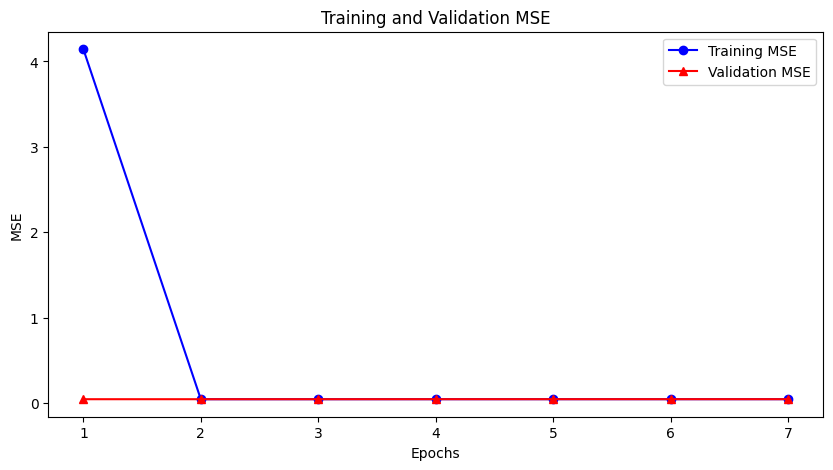

In [115]:
import matplotlib.pyplot as plt

# Setelah Anda melatih model, gunakan history untuk mendapatkan nilai MSE
mse_train = history.history['loss']
mse_val = history.history['val_loss']

epochs = range(1, len(mse_train) + 1)

# Membuat plot MSE
plt.figure(figsize=(10, 5))
plt.plot(epochs, mse_train, 'bo-', label='Training MSE')
plt.plot(epochs, mse_val, 'r^-', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Modeling Deep Learning Feature Kedua

In [116]:
## TUNING DAN PERBAIKAN LAINNYA (Dropout,EarlyStopping,l1_l2)
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = application_train # Kode ini memerlukan data nyata Anda
target = data['EXT_SOURCE_3']
data = data.drop(columns=['EXT_SOURCE_3'])

# Sementara, saya akan mengasumsikan bahwa 'data' dan 'target' sudah siap digunakan

# Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Membuat model dengan regularisasi dan struktur yang lebih kompleks
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), 
                          kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.3),  # Menambahkan Dropout untuk regularisasi
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dropout(0.3),  # Menambahkan Dropout untuk regularisasi
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    tf.keras.layers.Dense(1)
])

# Kompilasi model dengan learning rate yang disesuaikan
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Menambahkan callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Pelatihan model dengan EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=100,  # Meningkatkan jumlah epoch
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluasi model
predictions = model.predict(X_test)

# Metrik untuk regresi
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

/usr/local/lib/python3.9/dist-packages/keras/engine/data_adapter.py:1508: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Epoch 1/100
6151/6151 [==============================] - 16s 2ms/step - loss: 4.6588 - val_loss: 0.2050
Epoch 2/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.2028 - val_loss: 0.2050
Epoch 3/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.2028 - val_loss: 0.2050
Epoch 4/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.2029 - val_loss: 0.2053
Epoch 5/100
6151/6151 [==============================] - 16s 3ms/step - loss: 0.2031 - val_loss: 0.2053
Epoch 6/100
6151/6151 [==============================] - 15s 2ms/step - loss: 0.2031 - val_loss: 0.2053
Epoch 7/100
1922/1922 [==============================] - 2s 862us/step
Mean Squared Error: 0.1946660169600323
R^2 Score: -0.00032901009292585215


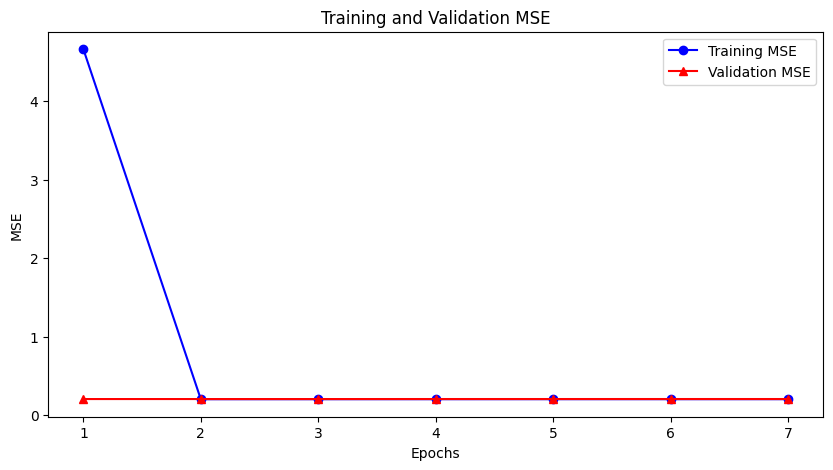

In [117]:
import matplotlib.pyplot as plt

# Setelah Anda melatih model, gunakan history untuk mendapatkan nilai MSE
mse_train = history.history['loss']
mse_val = history.history['val_loss']

epochs = range(1, len(mse_train) + 1)

# Membuat plot MSE
plt.figure(figsize=(10, 5))
plt.plot(epochs, mse_train, 'bo-', label='Training MSE')
plt.plot(epochs, mse_val, 'r^-', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## CLASSIFICATION WITH TARGET

In [118]:
data['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [119]:
import numpy as np

# Periksa distribusi kelas sebelum pembagian
print("Distribusi Kelas sebelum pembagian:")
print(np.unique(target, return_counts=True))

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Periksa distribusi kelas setelah pembagian
print("Distribusi Kelas di y_train:")
print(np.unique(y_train, return_counts=True))
print("Distribusi Kelas di y_test:")
print(np.unique(y_test, return_counts=True))

Distribusi Kelas sebelum pembagian:
(array([-5.07663093e-01,  5.27265239e-04,  1.13457194e-02,  1.27159239e-02,
        1.39484656e-02,  1.41482655e-02,  1.45563649e-02,  1.60781171e-02,
        1.65409482e-02,  1.67772514e-02,  1.70168720e-02,  1.75062455e-02,
        1.81374345e-02,  1.82663270e-02,  1.86584217e-02,  1.89243929e-02,
        1.90587694e-02,  1.94675368e-02,  2.00259511e-02,  2.01679886e-02,
        2.03110127e-02,  2.04550299e-02,  2.14915157e-02,  2.19512925e-02,
        2.24206800e-02,  2.27390386e-02,  2.30618111e-02,  2.32248707e-02,
        2.35543731e-02,  2.37208308e-02,  2.38884361e-02,  2.40571964e-02,
        2.42271194e-02,  2.43982125e-02,  2.47439401e-02,  2.49185898e-02,
        2.50944406e-02,  2.52715002e-02,  2.54497765e-02,  2.58100107e-02,
        2.59919845e-02,  2.61752069e-02,  2.63596859e-02,  2.65454297e-02,
        2.67324463e-02,  2.69207441e-02,  2.71103313e-02,  2.73012161e-02,
        2.74934071e-02,  2.78817406e-02,  2.80779003e-02,  2.82

In [120]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

# Mempersiapkan target dan fitur
target = data['TARGET']
features = data.drop(columns=['TARGET'])

# Preprocessing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Balancing data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Membuat model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menambahkan EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Pelatihan model
history = model.fit(
    X_train_smote, y_train_smote,
    epochs=100,
    batch_size=64,  # Disesuaikan
    validation_split=0.1,  # Disesuaikan
    callbacks=[early_stopping]
)

# Evaluasi model
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Metrik untuk klasifikasi
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")

Epoch 1/100
6360/6360 [==============================] - 16s 2ms/step - loss: 0.5829 - accuracy: 0.6916 - val_loss: 0.5238 - val_accuracy: 0.7351
Epoch 2/100
6360/6360 [==============================] - 15s 2ms/step - loss: 0.5448 - accuracy: 0.7255 - val_loss: 0.5628 - val_accuracy: 0.7075
Epoch 3/100
6360/6360 [==============================] - 15s 2ms/step - loss: 0.5246 - accuracy: 0.7400 - val_loss: 0.4768 - val_accuracy: 0.7725
Epoch 4/100
6360/6360 [==============================] - 15s 2ms/step - loss: 0.5112 - accuracy: 0.7496 - val_loss: 0.5142 - val_accuracy: 0.7277
Epoch 5/100
6360/6360 [==============================] - 16s 2ms/step - loss: 0.5005 - accuracy: 0.7574 - val_loss: 0.4357 - val_accuracy: 0.8156
Epoch 6/100
6360/6360 [==============================] - 15s 2ms/step - loss: 0.4928 - accuracy: 0.7623 - val_loss: 0.4168 - val_accuracy: 0.8298
Epoch 7/100
6360/6360 [==============================] - 15s 2ms/step - loss: 0.4853 - accuracy: 0.7679 - val_loss: 0.4240 -

## Prediksi

In [123]:
# Memuat model
loaded_model = tf.keras.models.load_model('/storage/model1.h5')

In [121]:
# Load the model
loaded_model = tf.keras.models.load_model('/storage/model1.h5')

# Make predictions
new_predictions = loaded_model.predict(data2)
new_predictions

1524/1524 [==============================] - 1s 912us/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [122]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Example: Load new data (replace this with your actual data loading)
new_data = data2

# Load the scaler used for the training data
scaler = joblib.load('path_to_saved_scaler.gz')

# Scale the new data using the loaded scaler
new_data_scaled = scaler.transform(new_data)

# Load the model
loaded_model = load_model('model1.h5')

# Make predictions
new_predictions = loaded_model.predict(new_data_scaled)

# Display or use the predictions
print(new_predictions)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- EXT_SOURCE_2
Feature names seen at fit time, yet now missing:
- TARGET




1524/1524 [==============================] - 1s 905us/step
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
